In [1]:
import numpy as np
import pandas as pd
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedKFold
import seaborn as sns
from sklearn.metrics import classification_report
from scipy.stats import loguniform
from sklearn.ensemble import GradientBoostingClassifier
np.random.seed(42)

In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/DMFC/JMC-Data.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape


(364, 36)

In [3]:
A=df['GP']
B=df["GE"]
C = df['CQD']
D = df['SWNT']
E = df["MWNT"]
F=df['CNF']
G=df["MC"]
H = df['CB']
I = df['N2']
J=df['SU']
K=df["CuO"]
L = df['CeO2']
M=df['MnO2']
N= df['MoO3']
O= df['Mn3O4']
P=df["WO3"]
Q=df["Au"]
R=df["Co"]
S=df["Cu"]
T=df["Fe"]
U=df["Ir"]
V=df['Ni']
W= df['Pd']
X= df['Pt']
Y=df["Ru"]
Z=df["SnO2"]
AA=df["TiO2"]
BB=df["Zn"]
CC=df["HPMO"]
DD=df['HSO']
EE= df['HClO']
FF= df['OH']
GG=df["MEOH"]
HH=df["SR"]
List = [A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W, X,Y,Z,AA,BB,CC,DD,EE,FF,GG,HH]
List1=pd.concat(List, axis=1, sort=True)
List1.head(5)
List1.shape

(364, 34)

In [4]:
X_OS=List1
Y_OS=df["CL"]

train accuracy 0.9914503617513238
test accuracy 0.94512012012012
train precision 0.9952340045524044
test precision 0.8941029252610134
train recall 0.9620495495495497
test recall 0.79875
train f1 0.9777801593737643
test f1 0.8247639947649847
train               precision    recall  f1-score   support

           0       0.99      1.00      0.99       291
           1       1.00      0.92      0.96        37

    accuracy                           0.99       328
   macro avg       0.99      0.96      0.98       328
weighted avg       0.99      0.99      0.99       328

test               precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.75      0.86         4

    accuracy                           0.97        36
   macro avg       0.98      0.88      0.92        36
weighted avg       0.97      0.97      0.97        36

Matthews correlation coefficient 0.9566298775465902
Matthews correlation coefficient 0.6753408

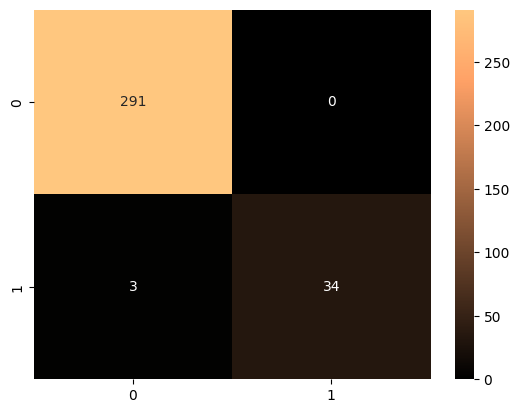

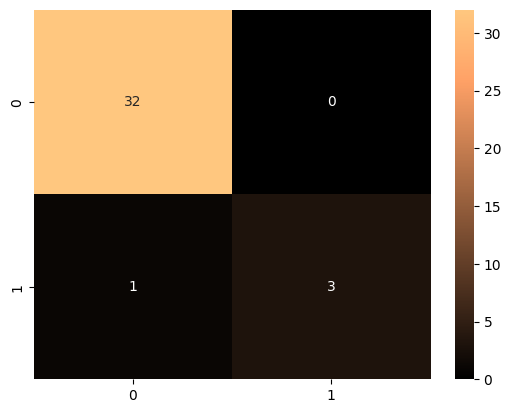

In [7]:
conf_matrix_Train =[] 
conf_matrix_Test=[]
mmc_xgbtrain=list()
mmc_xgbtest=list()
score_trainacc, score_testacc, score_trainpre, score_testpre, score_trainrecall, score_testrecall, score_trainf1, score_testf1 =list(), list(), list(), list(), list(), list(), list(), list()
cv = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
for train_index, test_index in cv.split(X_OS, Y_OS):
    X_Train, X_Test= X_OS.iloc[train_index], X_OS.iloc[test_index]
    Y_Train, Y_Test= Y_OS[train_index], Y_OS[test_index]
    XGB = XGBClassifier(random_state=1, n_estimators=1000, learning_rate=0.2, max_depth=2, max_delta_step=1, subsample=0.96, colsample_bytree=0.7,
                        alpha=0.5, )                     
    xgb_model=XGB.fit(X_Train, Y_Train)
    predict_xgbtrain=XGB.predict(X_Train)
    predict_xgbtest=XGB.predict(X_Test)  
    Acctrain = metrics.accuracy_score(Y_Train, predict_xgbtrain)
    score_trainacc.append(Acctrain)
    Acctest = metrics.accuracy_score(Y_Test, predict_xgbtest)
    score_testacc.append(Acctest)
    pretrain = metrics.precision_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainpre.append(pretrain)
    pretest = metrics.precision_score(Y_Test, predict_xgbtest, average="macro")
    score_testpre.append(pretest)
    recalltrain = metrics.recall_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainrecall.append(recalltrain)
    recalltest = metrics.recall_score(Y_Test, predict_xgbtest, average="macro")
    score_testrecall.append(recalltest)
    f1train = metrics.f1_score(Y_Train, predict_xgbtrain, average="macro")
    score_trainf1.append(f1train)
    f1test = metrics.f1_score(Y_Test, predict_xgbtest, average="macro")
    score_testf1.append(f1test)
    conf_matrix1 = confusion_matrix(Y_Train, predict_xgbtrain)
    conf_matrix2 = confusion_matrix(Y_Test, predict_xgbtest)
    mmc_train= metrics.matthews_corrcoef(Y_Train, predict_xgbtrain)
    mmc_xgbtrain.append(mmc_train)
    mmc_test= metrics.matthews_corrcoef(Y_Test, predict_xgbtest)
    mmc_xgbtest.append(mmc_test)
    
    
print("train accuracy", mean(score_trainacc))
print("test accuracy", mean(score_testacc))
print("train precision", mean(score_trainpre))
print("test precision", mean(score_testpre))
print("train recall", mean(score_trainrecall))
print("test recall", mean(score_testrecall))
print("train f1", mean(score_trainf1))
print("test f1", mean(score_testf1))
print("train", metrics.classification_report(Y_Train, predict_xgbtrain))
print("test", metrics.classification_report(Y_Test, predict_xgbtest))
print('Matthews correlation coefficient',mean(mmc_xgbtrain))
print('Matthews correlation coefficient',mean(mmc_xgbtest))
sns.heatmap(conf_matrix1, annot=True, cmap='copper', fmt="g")
plt.show()
sns.heatmap(conf_matrix2,annot=True,  cmap='copper', fmt="g")
plt.show()


[16:22:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


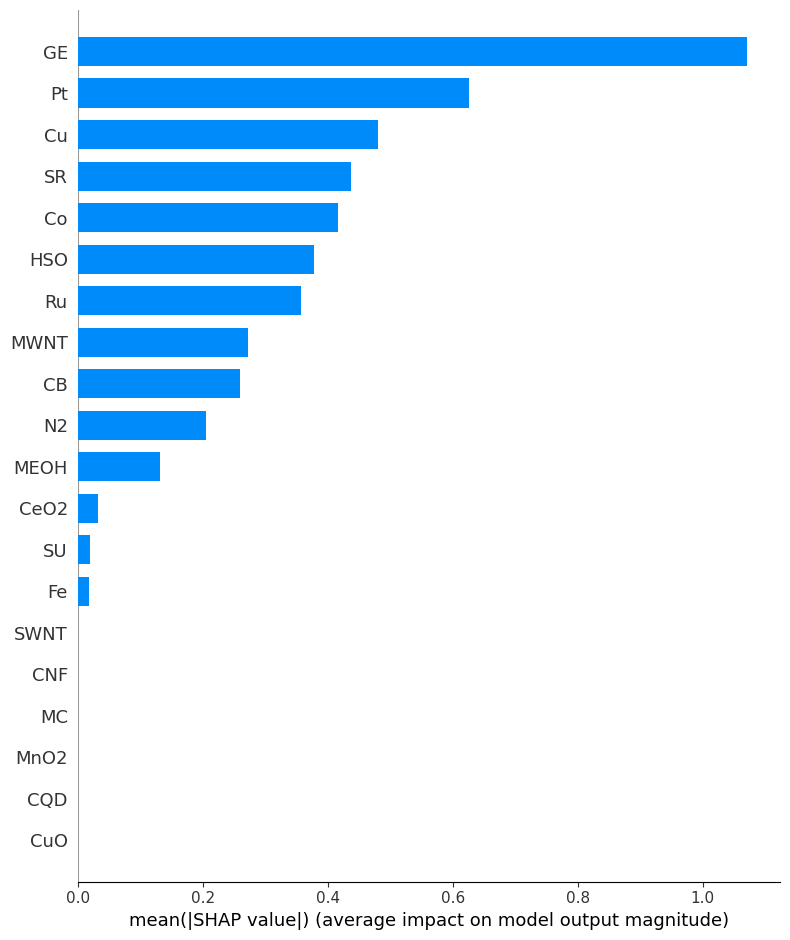

In [8]:
import shap
explainer = shap.TreeExplainer(XGB, X_Train)
shap_values_XGB = explainer.shap_values(X_Train)
shap.summary_plot(shap_values_XGB, X_Train, plot_type='bar')


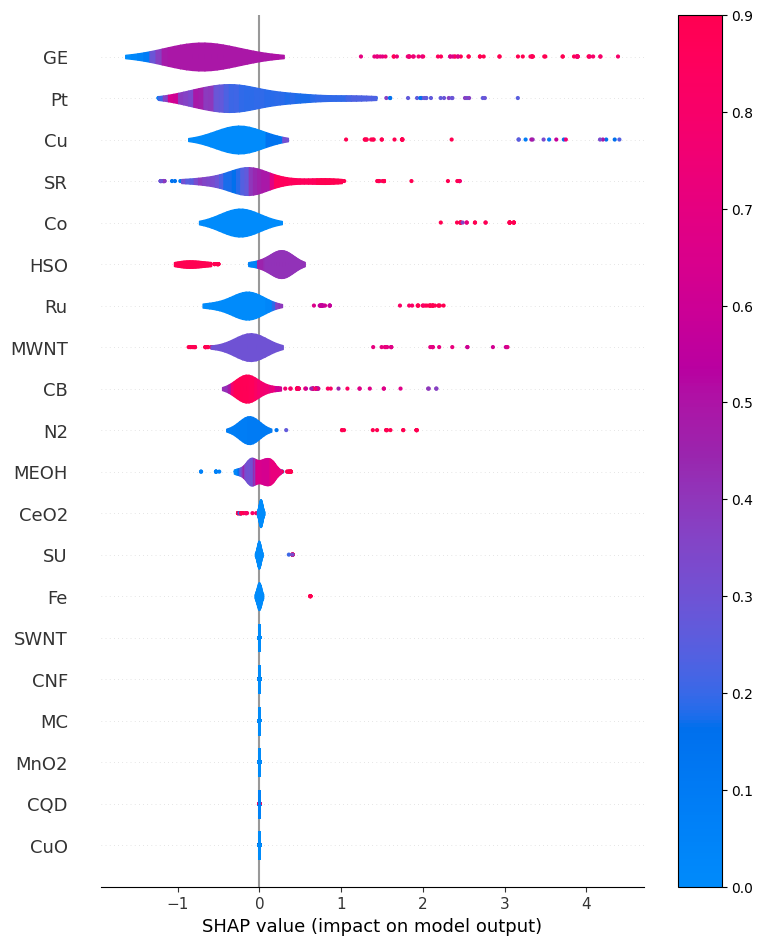

In [9]:
shap.summary_plot(shap_values_XGB, X_Train, show = False, color_bar = False, plot_type="violin")
plt.colorbar()
plt.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.844


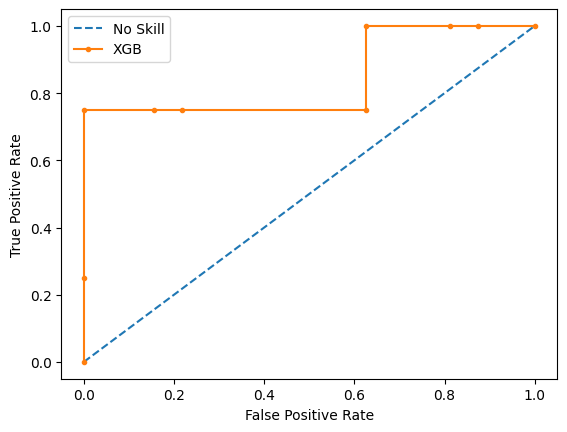

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs =XGB.predict_proba(X_Test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(Y_Test))]
ns_auc = roc_auc_score(Y_Test, ns_probs)
lr_auc = roc_auc_score(Y_Test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
ns_fpr, ns_tpr, _ = roc_curve(Y_Test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_Test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='XGB')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

XGB: f1=0.857 auc=0.787


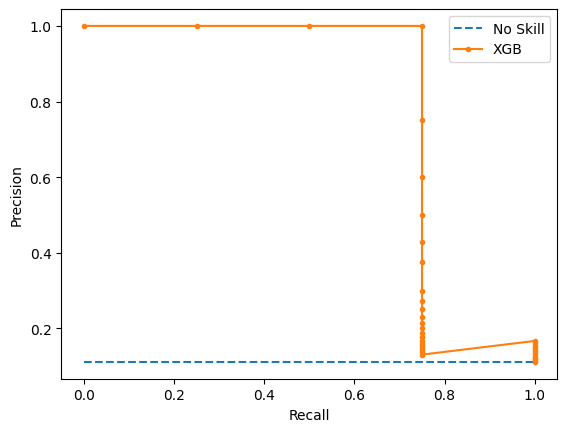

In [23]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
lr_precision, lr_recall, _ = precision_recall_curve(Y_Test, lr_probs)
yhat=XGB.predict(X_Test)
# calculate scores
lr_f1, lr_auc = f1_score(Y_Test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('XGB: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_Test[Y_Test==1]) / len(Y_Test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='XGB')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()